# Titanic - Análisis

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

In [1]:
import numpy as np
import pandas as pd

from datascience import get_cardinality_class, coeficiente_variacion
import vizdatatools as viz

### 1 - Cargar en un dataframe el dataset del titanic
Este se encuentra en la ruta "./data/titanic.csv".

In [2]:
titanic = pd.read_csv('./data/titanic.csv')
display(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 2 - Análisis y limpieza de los datos
Evaluar sus columnas, buscar valores missing o repetidos, y decidir que hacer con estos.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
# Las siguientes columnas tienen al menos un valor nulo en su fila
columns_with_na = [column for column in titanic.columns if titanic[column].isna().any()]
columns_with_na

['age', 'embarked', 'deck', 'embark_town']

In [5]:
# Hay muchos elementos duplicados, pero no me preocupa de momento porque hay datos missing
titanic[titanic.duplicated(keep=False)]   

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Porcentaje de valores nulos
for column in columns_with_na:
    print(f'{column}: {round(titanic[column].isna().mean(), 4)}')     

age: 0.1987
embarked: 0.0022
deck: 0.7722
embark_town: 0.0022


In [7]:
mask = titanic['embarked'].isna() | titanic['embark_town'].isna()
display(titanic[mask])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


Solo son dos filas con valores NaN (algo que ya sabíamos) y no parece poder inferirse con ningún criterio esa información, así que los elimino porque no va afectar negativamente a los análisis.

In [8]:
# Hago una copia del data frame. Esta será sobre la que voy a aplicar las modificaciones e hipótesis
titanic_mod = titanic.copy()

# Elimina las filas con valores nulos de 'embarked' y 'embark_town'
titanic_mod.dropna(subset=['embarked', 'embark_town'], inplace=True) 

Además, se demuestra en las siguientes líneas que las letras de "embarked", coinciden con la primera letra de cada elemento de "embark_town", así que contienen información redundante, y por tanto vamos a eliminar la columna "embarked".


In [9]:
# Comprobar que todas las primeras letras de "embark_town" coinciden con "embark"
print( (titanic_mod['embarked'] == titanic_mod['embark_town'].str[0]).value_counts() )

# Eliminar la columna redundante "embarked"
titanic_mod.drop(columns=['embarked'], inplace=True)    


True    889
Name: count, dtype: int64


In [10]:
# Analizar los valores de "deck"
titanic_mod['deck'].value_counts(normalize=True, dropna=False) 

deck
NaN    0.773903
C      0.066367
B      0.050619
D      0.037120
E      0.035996
A      0.016873
F      0.014623
G      0.004499
Name: proportion, dtype: float64

"deck" tiene demasiado valores nulos como para estimar de primeras su valor o poder relacionarlo con otras columnas. No hago nada con ella y no la usaré de momento en los análisis.

In [11]:
# Análisis de la columna "age"
titanic_mod.age.describe()  

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Hay dispersión en los resultados de la edad, pero los valores missings no son tantos. 

Las edades van desde los 0.42 años (bebés) hasta 80 años. Voy a sustituir los valores NaN por la media de cada grupo (niños, mujeres y hombres), pero a la vez creo una nueva columna que indique que ese dato es estimado, y no original del data frame.

In [12]:
# Marcar los valores que originalmente eran NaN
titanic_mod['age_was_NaN'] = titanic_mod['age'].isna() 


# Sustituir los valores NaN por la media de cada grupo (niños, mujeres, hombres)
is_man = titanic_mod['who'] == 'man'
is_woman = titanic_mod['who'] == 'woman'
is_child = titanic_mod['who'] == 'child'

man_mean_age = round(titanic_mod.loc[is_man, 'age'].mean(), 1)
woman_mean_age = round(titanic_mod.loc[is_woman, 'age'].mean(), 1)
child_mean_age = round(titanic_mod.loc[is_child, 'age'].mean(), 1)

titanic_mod.loc[is_man, 'age'] = titanic_mod.loc[is_man, 'age'].fillna(man_mean_age)
titanic_mod.loc[is_woman, 'age'] = titanic_mod.loc[is_woman, 'age'].fillna(woman_mean_age)
titanic_mod.loc[is_child, 'age'] = titanic_mod.loc[is_child, 'age'].fillna(child_mean_age)

Como llevan información redundante sumo las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [13]:
titanic_mod['family_members'] = titanic_mod['parch'] + titanic_mod['sibsp'] # número de parientes de cada pasajero
titanic_mod.drop(columns=['parch', 'sibsp'], inplace=True)

Por último elimino las columnas con información redundante: survived y pclass. Que llevan la misma información que alive y class respectivamente

In [14]:
titanic_mod.drop(columns=['survived', 'pclass'], inplace=True)
titanic_mod

,sex,age,fare,class,who,adult_male,deck,embark_town,alive,alone,age_was_NaN,family_members
0,male,22.0,7.2500,Third,man,True,NaN,Southampton,no,False,False,1
1,female,38.0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,1
2,female,26.0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,0
3,female,35.0,53.1000,First,woman,False,C,Southampton,yes,False,False,1
4,male,35.0,8.0500,Third,man,True,NaN,Southampton,no,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,NaN,Southampton,no,True,False,0
887,female,19.0,30.0000,First,woman,False,B,Southampton,yes,True,False,0
888,female,31.8,23.4500,Third,woman,False,NaN,Southampton,no,False,True,3
889,male,26.0,30.0000,First,man,True,C,Cherbourg,yes,True,False,0


In [15]:
titanic_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             889 non-null    object 
 1   age             889 non-null    float64
 2   fare            889 non-null    float64
 3   class           889 non-null    object 
 4   who             889 non-null    object 
 5   adult_male      889 non-null    bool   
 6   deck            201 non-null    object 
 7   embark_town     889 non-null    object 
 8   alive           889 non-null    object 
 9   alone           889 non-null    bool   
 10  age_was_NaN     889 non-null    bool   
 11  family_members  889 non-null    int64  
dtypes: bool(3), float64(2), int64(1), object(6)
memory usage: 72.1+ KB


### 3 - Análisis

Con los datos limpios, vamos a hacer un análisis de los resultados.

In [16]:
# Calcular la cardinalidad y el tipo de variable de cada columna
titanic_cardinalidad = get_cardinality_class(titanic_mod, 15, 20)
titanic_cardinalidad

,Card,%_Card,Tipo,Clase
sex,2,0.224972,object,Binaria
age,90,10.123735,float64,Numérica Discreta
fare,247,27.784027,float64,Numérica Continua
class,3,0.337458,object,Categórica
who,3,0.337458,object,Categórica
adult_male,2,0.224972,bool,Binaria
deck,7,0.787402,object,Categórica
embark_town,3,0.337458,object,Categórica
alive,2,0.224972,object,Binaria
alone,2,0.224972,bool,Binaria


#### 3.1 - Análisis de las variables categóricas

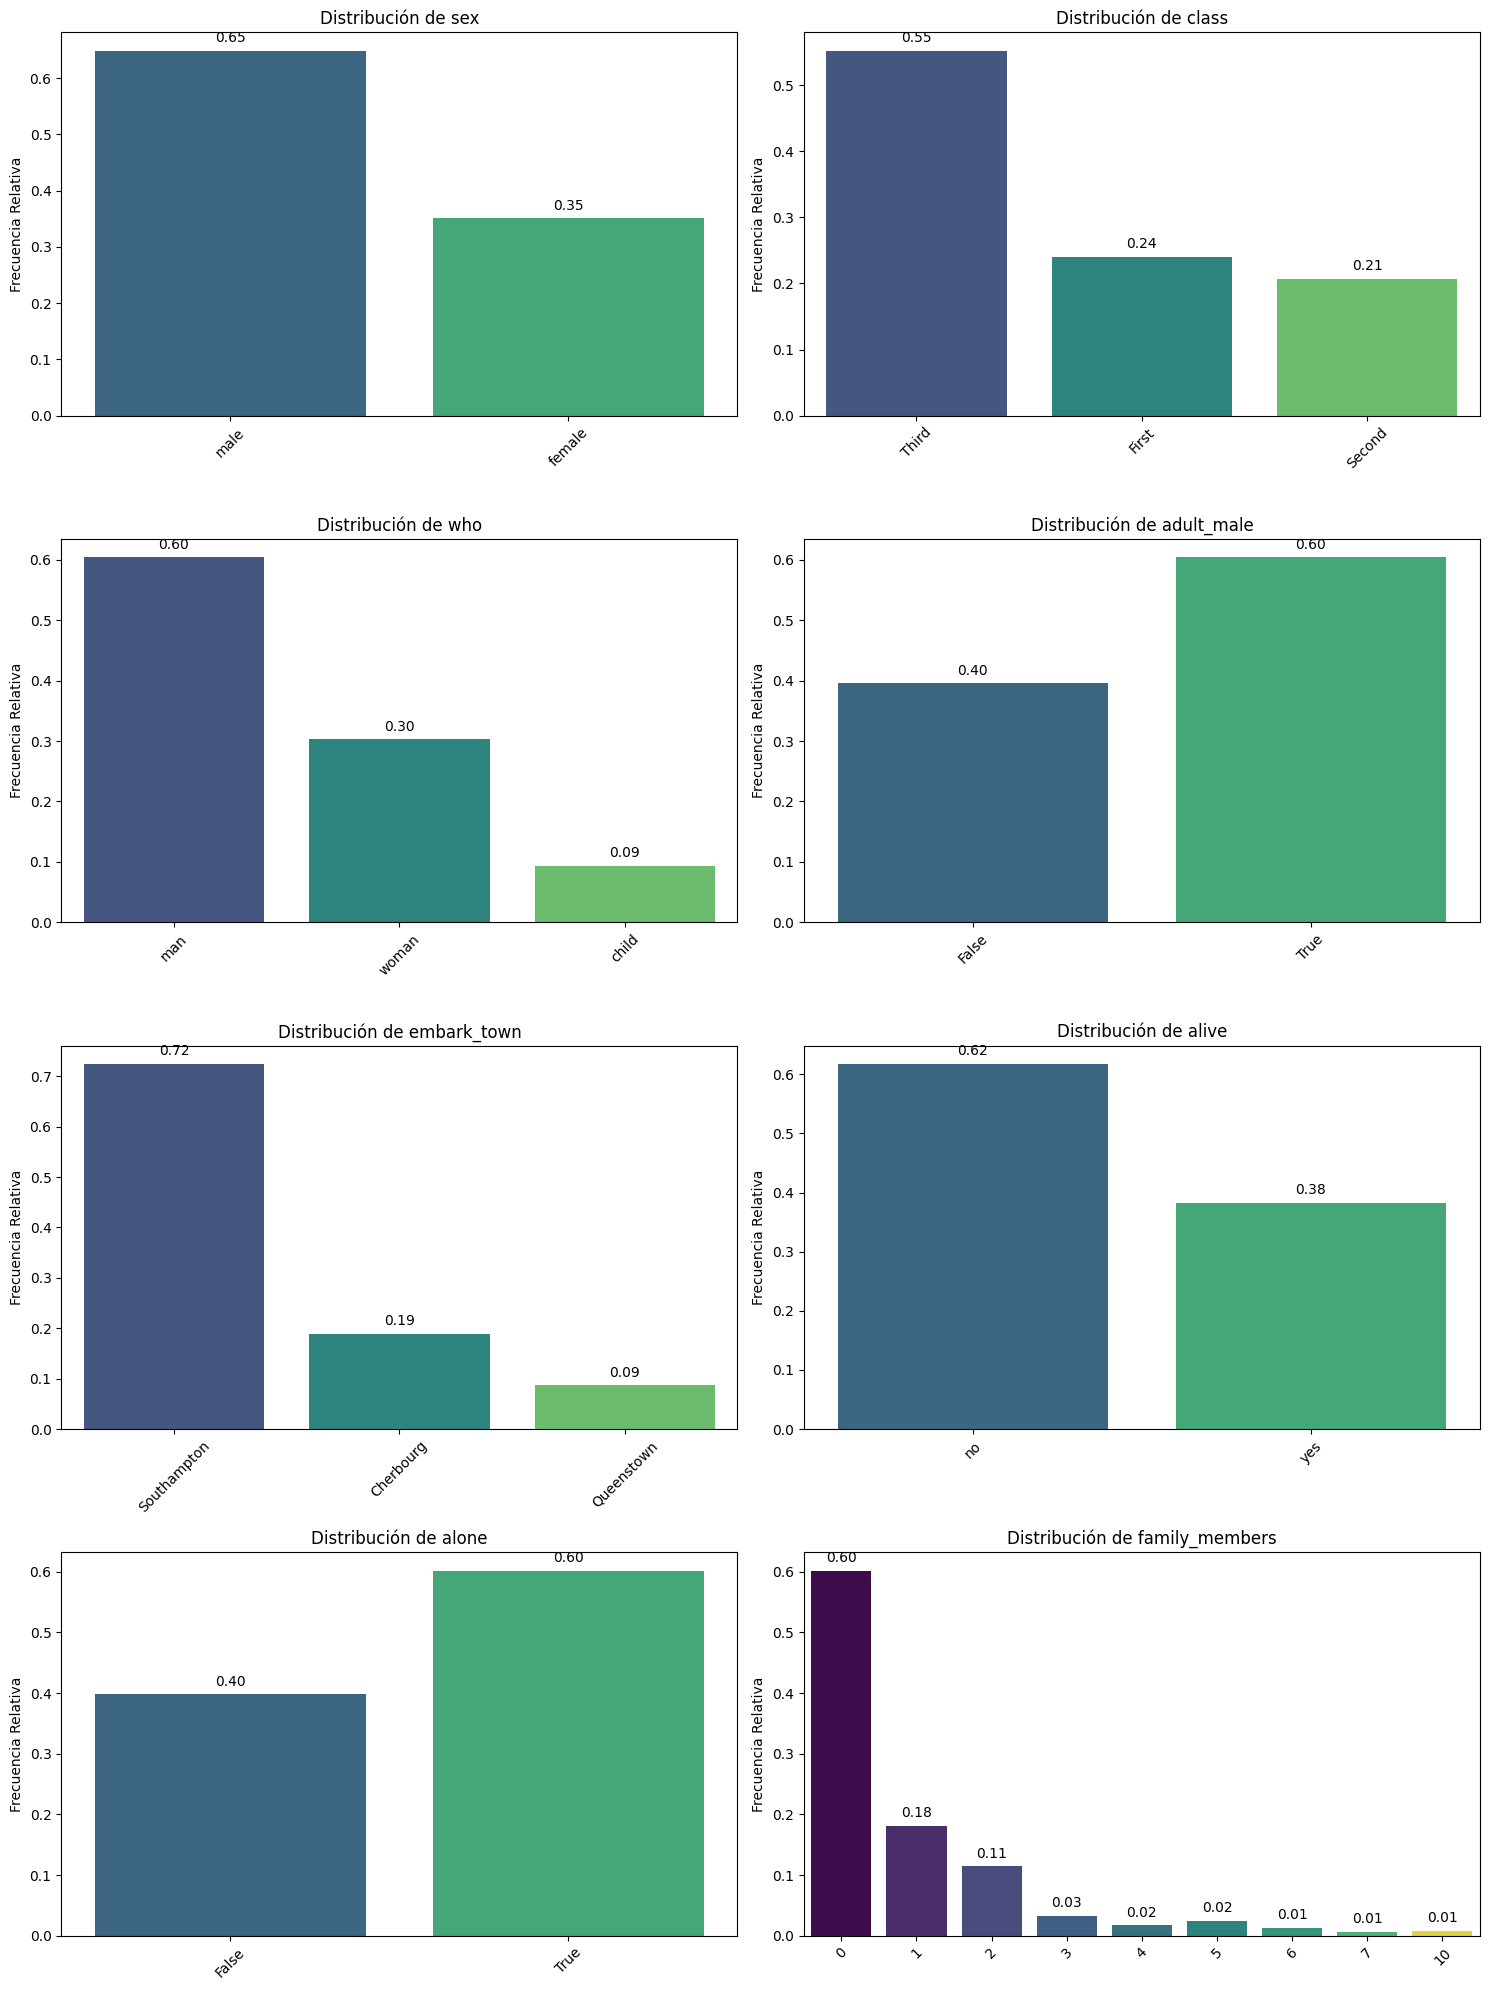

In [24]:
# Vamos a analizar solo estas
col_categoricas = ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'family_members']

# Distribución de frecuencias
viz.plot_categorical_distribution(titanic_mod, col_categoricas, relative = True)

Aunque el dataset no es muy extenso (unos 900 datos) me parece conveniente hacer análisis relativo. Se pueden presentar algunas ideas sobre los resultados en un análisis univariante, pero también se puede adelantar alguna hipótesis sobre como estas pueden estar relacionadas con las demás.
1. Más del 60% de los pasajeros murió (presumiblemente por una mala gestión de los botes salvavidas).

2. Hay tres resultados que destacan en sus respectivas categorías:
    - La mayoría de los viajeros eran hombres adultos.
    - La mayoría de viajeros viajaban en tercera clase.
    - La mayoría de viajeros partió de Southampton.
    
3. Es de esperar que estas tres variables estén relacionadas con la primera si la distribución es estándar. Es decir, que la mayoría de fallecidos sean hombres adultos, que viajaban en tercera clase y que partieron de Southampton.

4. Un 60 frente a 40 % de los viajeros del Titanic viajaban solos.

#### 3.2 - Análisis de las variables numéricas

,std,mean,CV
age,13.031985,30.267008,0.430567
fare,49.697504,32.096681,1.548369
family_members,1.614703,0.906637,1.780981


,age,fare
count,889.000000,889.000000
mean,30.267008,32.096681
std,13.031985,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,31.800000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


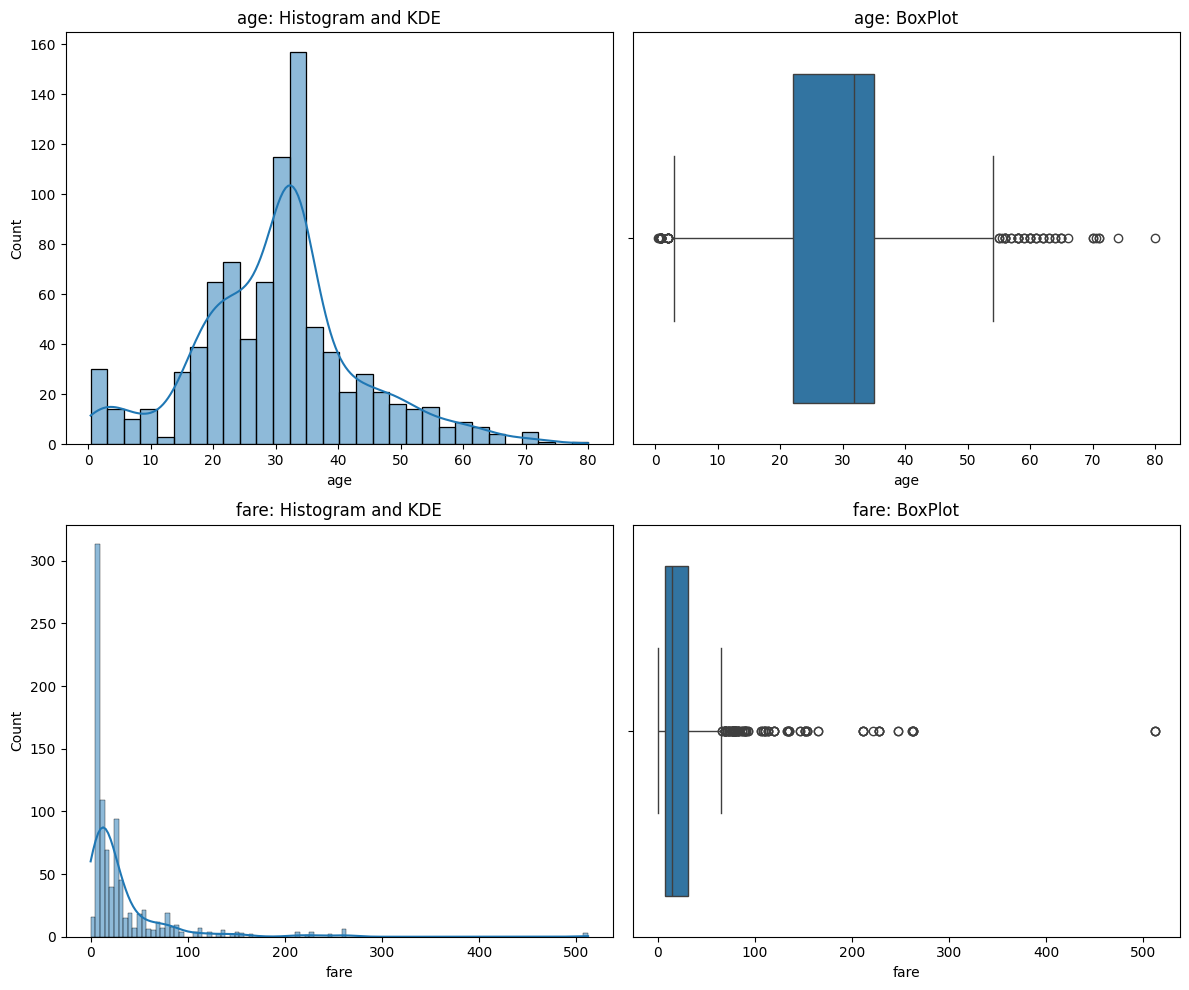

In [23]:
# Vamos a analizar solo estas
col_numericas = ['age', 'fare']     

# Coeficiente de variación
display(coeficiente_variacion(titanic_mod))

# Tendencia central
display(titanic_mod[col_numericas].describe())

# Análisis gráfico
viz.plot_multiple_histograms_KDEs_boxplots(titanic_mod, col_numericas)

1. Analisis de "age":
    - Parece que tenga una distribución similar a una Gaussiana. Los cual es típico de poblaciones estables. Es este caso en que el número de individuos es limitado hay que coger con pinzas esa afirmación. Sin embargo si se observa claramente que entre los 20 y 40 años es donde cae la mayor parte de la población.
    - Por debajo de los 35 años se encuenta el 75% de los individuos. (tercer cuartil).
    - Hay valores outlier, correspondientes a bebes y personas ancianas. No son valores erróneos y no los descartaría.

2. Análisis de "fare":
    - La mayor parte de nuestra población pagó un precio bajo por su billete. Eso casa con el resultado anterior en la que vimos que la tercera clase era la más típica entre los viajeros.
    - La distribución parece "log normal".
    - Hay valores outlier correspondientes a personas que pagaron billetes muy caros (clase muy selecta).